# EXAMPLE 2:
In this example we show how one can perturb the initial condition of the KS equation.
This is done to investigate initial condition sensitivity. And demonstrate that one can instanciate two instances of the class for comparison. 

In [23]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ml_collections import ConfigDict
from models.ETD_KT_CM_JAX_Vectorised import *
from filters import resamplers
from filters.filter import ParticleFilter
from jax.config import config
config.update("jax_enable_x64", True)

In [24]:
signal_params = ConfigDict(KS_params)
signal_model = ETD_KT_CM_JAX_Vectorised(signal_params)
signal_model_2 = ETD_KT_CM_JAX_Vectorised(signal_params)
print(signal_model.params)
print(signal_model.nmax)

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 0
S: 0
c_0: 0
c_1: 1
c_2: 1
c_3: 0.0
c_4: 1
dt: 0.25
equation_name: Kuramoto-Sivashinsky
initial_condition: Kassam_Trefethen_KS_IC
method: Dealiased_ETDRK4
noise_magnitude: 0.0
nx: 256
tmax: 150
xmax: 100.53096491487338
xmin: 0

600


Now we continue to define a stochastic ensemble

Now we specify the models, by calling the class.

In [25]:
initial_signal = initial_condition(signal_model.x, signal_params.E, signal_params.initial_condition)
initial_signal_2 = initial_signal + 1e-8*jnp.asarray(np.random.randn(*initial_signal.shape))
time = jnp.linspace(0, signal_model.params.tmax, signal_model.nmax)

In [26]:
final, all = signal_model.run(initial_signal, signal_model.nmax,None) 
final_2, all_2 = signal_model_2.run(initial_signal_2, signal_model.nmax,None)  

Put in the initial condition.

In [27]:

signal = jnp.concatenate([initial_signal[None,...], all], axis=0)
signal_2 = jnp.concatenate([initial_signal_2[None,...], all_2], axis=0)


In [28]:
def plot(da_step):
    plt.plot(signal_model.x, signal[da_step,0,:], color='k',label='signal')
    plt.plot(signal_model.x, signal_2[da_step,0,:], color='r',label='signal_perturbed')
    plt.legend()
    plt.show()

interact(plot, da_step=(0, signal_model.nmax))

interactive(children=(IntSlider(value=300, description='da_step', max=600), Output()), _dom_classes=('widget-i…

<function __main__.plot(da_step)>

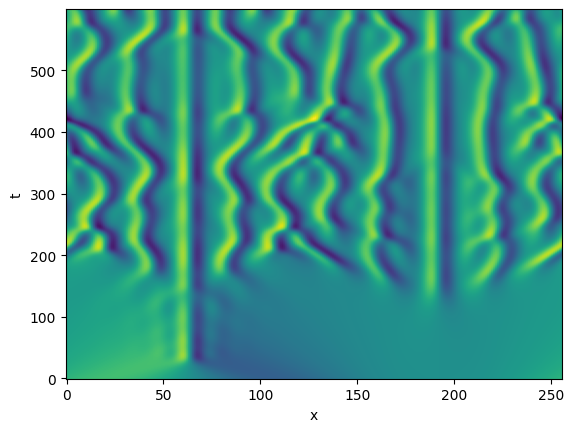

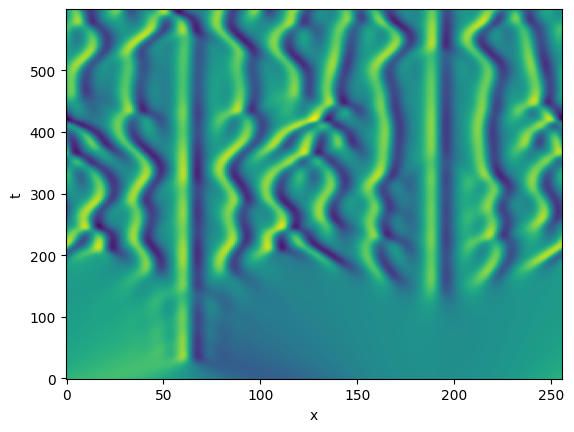

In [29]:
plt.imshow(all[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()
plt.imshow(all_2[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Text(0, 0.5, 'L2 Relative difference')

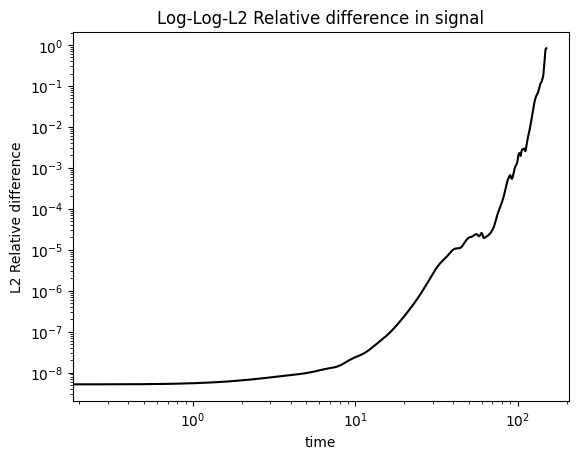

In [35]:
difference  = all[:,0,:] - all_2[:,0,:]
plt.title('Log-Log-L2 Relative difference in signal')
plt.loglog(time, jnp.linalg.norm(difference, axis=-1)/jnp.linalg.norm(all[:,0,:], axis=-1),c='k')
plt.xlabel('time')
plt.ylabel('L2 Relative difference')

We see that the initial condition pertubation grows by order magnitude $10^8$. 